In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import math
import time
import datetime
%matplotlib inline
from matplotlib.pylab import rcParams

In [2]:
test= pd.read_csv('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/IAT_sebastian/dataset_26_april_3.csv')

In [3]:
import datetime
longTime=test.loc[0:,['longTime']]
longTime=longTime.as_matrix()
a=[]
date_time_array=[]
for k in longTime:
    a=np.append(a,k)
str_time=[]
correct_longtime=[]
datetime_time=[]
count=0
for b in a:
    b=int(b) # make plain integer
    str_b=str(b)
    c=str_b[-3:]
    new_str_b=str_b.replace(c, '',1)
    new_str_b_time=int(new_str_b)
    correct_longtime.append(new_str_b_time)
    now_time=datetime.datetime.fromtimestamp(new_str_b_time)
    convert_time=now_time.strftime('%Y-%m-%d %H:%M')
    str_time.append(convert_time)
# print(str_time)
test_new = test.assign(stringTime=str_time,correct_longtime=correct_longtime) # here new column in the panda dataframe for string_time has added

/home/atif/anaconda3/envs/venv/lib/python3.6/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


In [4]:
test_new['dateTime'] =  pd.to_datetime(test_new['stringTime'], format='%Y-%m-%d %H:%M')

In [5]:
test_new.shape #ROWS, COLUMNS

(25000, 4223)

In [6]:
univariate_data=test_new.loc[500:24999,['dateTime','AEDAHO_T9_V2']]
univariate_data = univariate_data.set_index('dateTime')
univariate_data=univariate_data.loc[::-1]

shape of univariate_data:  (24500, 1)


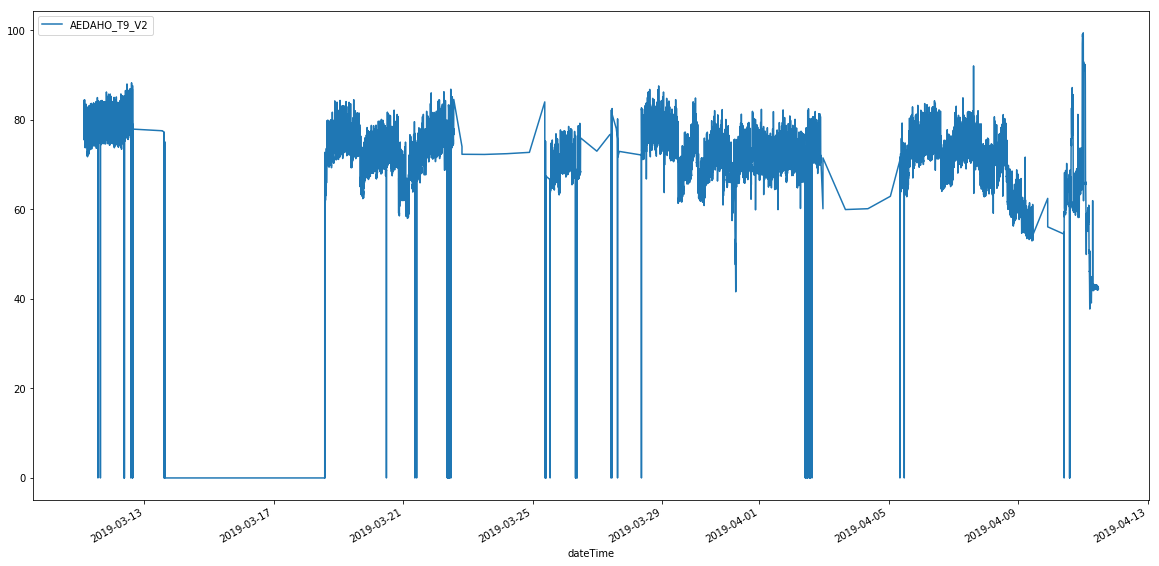

In [8]:
print('shape of univariate_data: ',univariate_data.shape)
univariate_data.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [10]:
# remove this line if you want do not want to count mean. Just comment it and uncomment the below lines.
uni_mean=univariate_data.mean()
univariate_data_mean= univariate_data.replace(0,uni_mean)
univariate_data_drop_zero=univariate_data_mean

In [8]:
# from numpy import nan
# univariate_data_drop_zero= univariate_data.replace(0,nan)
# univariate_data_drop_zero= univariate_data_drop_zero.dropna(how='any',axis=0)

shape of univariate_data:  (24500, 1)
shape of univariate_data_drop_zero:  (24500, 1)


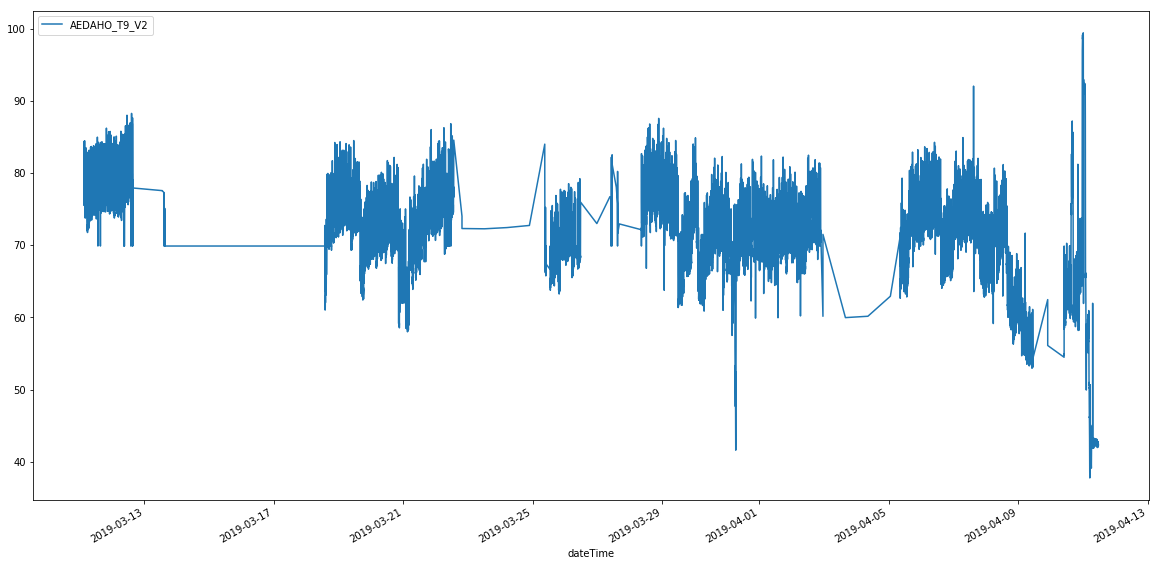

In [11]:
print('shape of univariate_data: ',univariate_data.shape)
print('shape of univariate_data_drop_zero: ',univariate_data_drop_zero.shape)

univariate_data_drop_zero.plot()
plt.rcParams['figure.figsize'] =(20,10)
plt.show()

In [12]:
dataset=np.array(univariate_data_drop_zero)
print(dataset)

[[83.32736136]
 [84.31481413]
 [84.38094341]
 ...
 [42.343193  ]
 [42.48031501]
 [42.30518655]]


# VANILLA LSTM

In [13]:
NumberOfElements=int(len(dataset)*0.9)
print('Number of Elements for training: ',NumberOfElements)
print('dataset length: ',len(dataset))

train_data_vanilla=dataset[0:NumberOfElements]
print(train_data_vanilla.shape)
test_data_vanilla=dataset[NumberOfElements:len(dataset)]
print(test_data_vanilla.shape)

Number of Elements for training:  22050
dataset length:  24500
(22050, 1)
(2450, 1)


In [14]:
print(type(train_data_vanilla))

<class 'numpy.ndarray'>


In [38]:
###############################test###################

from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    print(len(sequence))
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        print('printing i and end_ix : ',i,'\t',end_ix)
        print('\nprinting seqence:',sequence[i:end_ix],'\t',sequence[end_ix])
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)


x=array([[2],[4],[5],[6],[7]])

X_train,Y_train=split_sequence(x,2)
print(x.shape[1])
n_features=1
v=array([[[2,3,2]],[[4,5,7]]])
print(v.shape)

5
printing i and end_ix :  0 	 2

printing seqence: [[2]
 [4]] 	 [5]
printing i and end_ix :  1 	 3

printing seqence: [[4]
 [5]] 	 [6]
printing i and end_ix :  2 	 4

printing seqence: [[5]
 [6]] 	 [7]
1
(2, 1, 3)


In [66]:
n= array([[[2,3]]])
print(n.shape)
print(n)
m=n.reshape(n.shape[2],n.shape[1],n.shape[0])
print(m.shape)
print(m)

(1, 1, 2)
[[[2 3]]]
(2, 1, 1)
[[[2]]

 [[3]]]


In [15]:
from numpy import array
 
# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    print(len(sequence))
    X, y = list(), list()
    for i in range(len(sequence)):
        # find the end of this pattern
        end_ix = i + n_steps
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return array(X), array(y)

# choose a number of time steps
n_steps = 1
# split into samples
X_train_vanilla, y_train_vanilla = split_sequence(train_data_vanilla, n_steps)
# print(X.shape,'\t',X.ndim,'\t',X.size)
# print(y.shape,'\t',y.ndim,'\t',y.size)
print(X_train_vanilla.shape,'\t',X_train_vanilla.ndim,'\t',X_train_vanilla.size)
print(y_train_vanilla.shape,'\t',y_train_vanilla.ndim,'\t',y_train_vanilla.size)
# summarize the data
# for i in range(len(X)):
# 	print(X[i], y[i])

22050
(22049, 1, 1) 	 3 	 22049
(22049, 1) 	 2 	 22049


In [16]:
n_features = 1
X_train_vanilla = X_train_vanilla.reshape((X_train_vanilla.shape[0], X_train_vanilla.shape[1], n_features))

In [23]:
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.callbacks import LearningRateScheduler, ModelCheckpoint

lr = 0.01

def lr_schedule(epoch):
    return lr * (0.1 ** int(epoch / 10))

batch_size=32
epochs=10

# define model
model = Sequential()
model.add(LSTM(50, activation='relu', input_shape=(n_steps, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse',metrics=['accuracy'])
# fit model
train_model=model.fit(X_train_vanilla, y_train_vanilla, batch_size=batch_size, epochs=epochs,validation_split=0.2, verbose=1,
          callbacks=[LearningRateScheduler(lr_schedule),
                     ModelCheckpoint('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/vanilla_100.h5', save_best_only=True)])


Train on 17639 samples, validate on 4410 samples
Epoch 1/10
17639/17639 [==============================] - 2s 105us/step - loss: 84.1965 - acc: 0.0000e+00 - val_loss: 1.9009 - val_acc: 0.0000e+00
Epoch 2/10
17639/17639 [==============================] - 1s 63us/step - loss: 2.0883 - acc: 0.0000e+00 - val_loss: 1.8970 - val_acc: 0.0000e+00
Epoch 3/10
17639/17639 [==============================] - 1s 75us/step - loss: 2.0919 - acc: 0.0000e+00 - val_loss: 1.9433 - val_acc: 0.0000e+00
Epoch 4/10
17639/17639 [==============================] - 1s 78us/step - loss: 2.1271 - acc: 0.0000e+00 - val_loss: 1.8680 - val_acc: 0.0000e+00
Epoch 5/10
17639/17639 [==============================] - 1s 66us/step - loss: 2.1656 - acc: 0.0000e+00 - val_loss: 1.9488 - val_acc: 0.0000e+00
Epoch 6/10
17639/17639 [==============================] - 1s 69us/step - loss: 2.2039 - acc: 0.0000e+00 - val_loss: 1.8782 - val_acc: 0.0000e+00
Epoch 7/10
17639/17639 [==============================] - 1s 65us/step - loss: 

In [48]:
# this line of code you can use if you want to save model as JSON file then .h5 format
# serialize model to JSON
# model_json = model.to_json()
# with open("VanillaLSTM_model.json", "w") as json_file:
#     json_file.write(model_json)
# serialize weights to HDF5
# model.save_weights("VanillaLSTM_model.h5")
# print("Saved model to disk")

In [24]:
test_ip_vanilla,test_op_vanilla=split_sequence(test_data_vanilla,n_steps)
X_test_ip_vanilla=test_ip_vanilla.reshape((test_ip_vanilla.shape[0], test_ip_vanilla.shape[1], n_features))

2450


In [25]:
yhat = model.predict(X_test_ip_vanilla, verbose=1)
# print(yhat)

2449/2449 [==============================] - 0s 78us/step


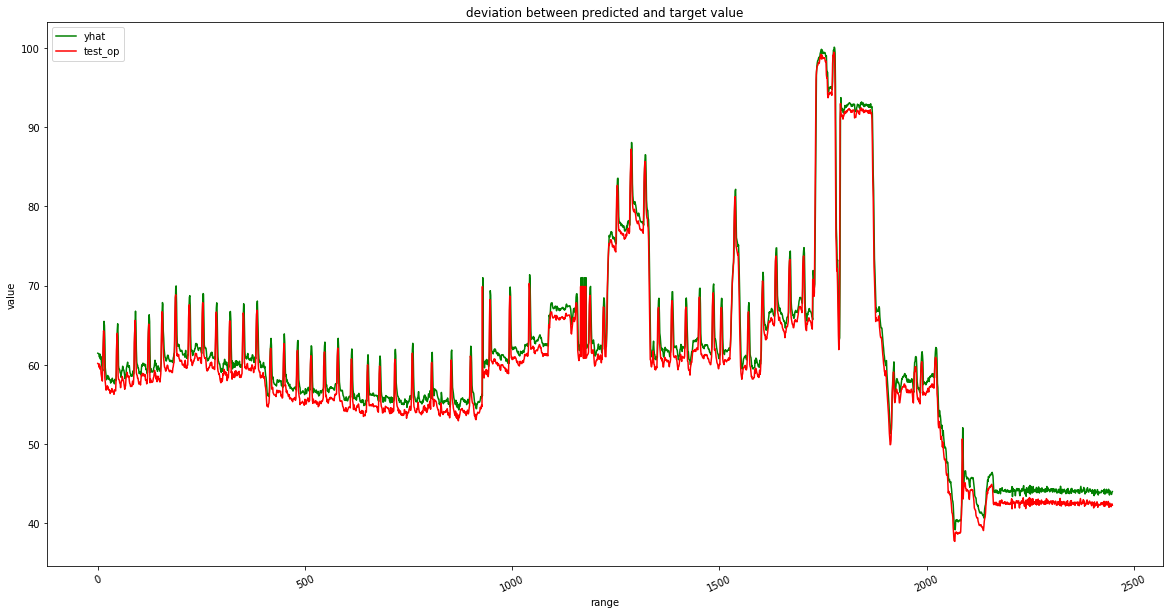

In [30]:
# my_data_1.index[0:-1]
plt.plot(yhat,color='green')
plt.plot(test_op_vanilla,color='red')
plt.xticks( rotation=25)
plt.title('deviation between predicted and target value')
plt.ylabel('value')
plt.xlabel('range')
plt.legend(['yhat', 'test_op'], loc='upper left')
plt.show()

In [27]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(test_op_vanilla,yhat)
print(Error)

3.4156457832207003


# here trying to load saved model file. It will help to save time to test without training every time

In [74]:
# from keras.models import model_from_json
# # load json and create model
# json_file = open('VanillaLSTM_model.json', 'r')
# loaded_model_json = json_file.read()
# json_file.close()
# loaded_model = model_from_json(loaded_model_json)
# # load weights into new model
# loaded_model.load_weights("VanillaLSTM_model.h5")
# print("Loaded model from disk")

In [75]:
# # loaded_model.compile(loss='binary_crossentropy', optimizer='rmsprop', metrics=['accuracy'])
# # score = loaded_model.evaluate(X, Y, verbose=0)
# # print("%s: %.2f%%" % (loaded_model.metrics_names[1], score[1]*100))
# yhat_new= loaded_model.predict(X_test_ip_vanilla, verbose=1)

In [76]:
# # my_data_1.index[0:-1]
# plt.plot(yhat_new,color='green')
# plt.plot(test_op_vanilla,color='red')
# plt.xticks( rotation=25)
# plt.show()

In [77]:
# from sklearn.metrics import mean_squared_error

# #Print MSE to see how good the model is
# Error = mean_squared_error(test_op_vanilla,yhat_new)
# print(Error)

# Here try to load model file which has saved directly in the phase of training as .h5 format.

In [18]:
from keras.models import load_model

load_trained_model=load_model('/media/atif/BE0E05910E0543BD/University of Bremen MSc/masters_thesis/forecasting_sensor_data_Salzgitter_AG/trained_model_file/vanilla_100.h5')

Using TensorFlow backend.


In [19]:
y_pred=load_trained_model.predict(X_test_ip_vanilla)

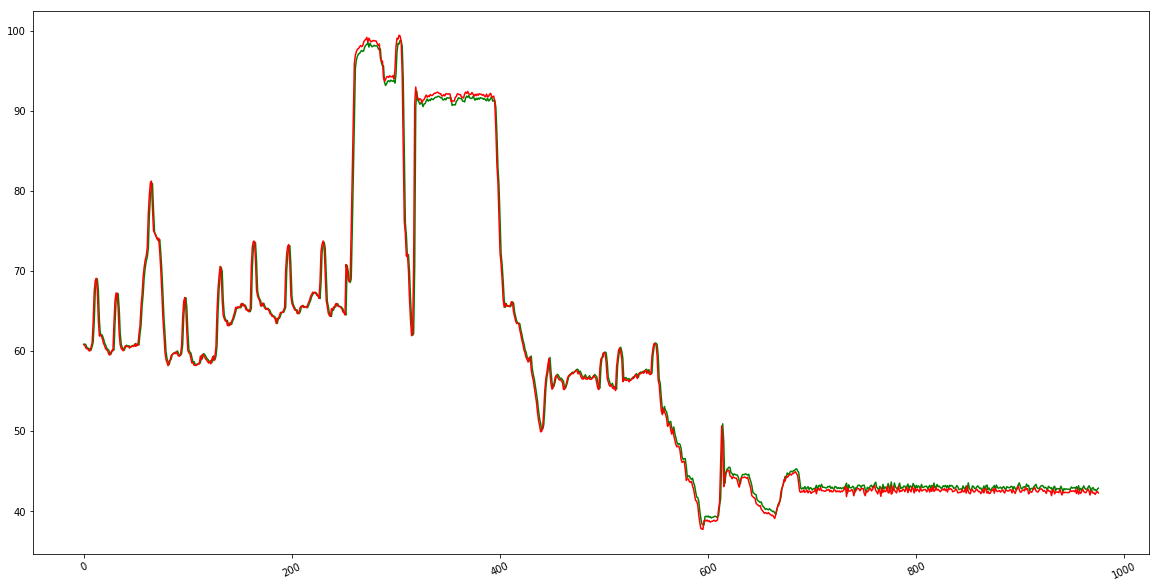

In [20]:
plt.plot(y_pred,color='green')
plt.plot(test_op_vanilla,color='red')
plt.xticks( rotation=25)
plt.show()

In [21]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(test_op_vanilla,y_pred)
print(Error)

1.8510196037919036


# what is forecasting ???

In [ ]:
# y_forecast=load_trained_model.for

# making completey new test data

In [85]:
test_value=test_new.loc[24000:24050,['dateTime','AEDAHO_T9_V2']]
test_value= test_value.set_index('dateTime')
test_value=test_value.loc[::-1]
test_value_array=np.array(test_value)
test_value_array=test_value_array[0:len(test_value_array)]

In [65]:
# no=len(test_value)
# print(type(no))
# print(no)
# print(type(test_value))

In [86]:
test_ip_vanilla_1,test_op_vanilla_1=split_sequence(test_value_array,n_steps)
X_test_ip_vanilla_1=test_ip_vanilla_1.reshape((test_ip_vanilla_1.shape[0], test_ip_vanilla_1.shape[1], n_features))

51


In [87]:
y_pred_2=load_trained_model.predict(X_test_ip_vanilla_1)

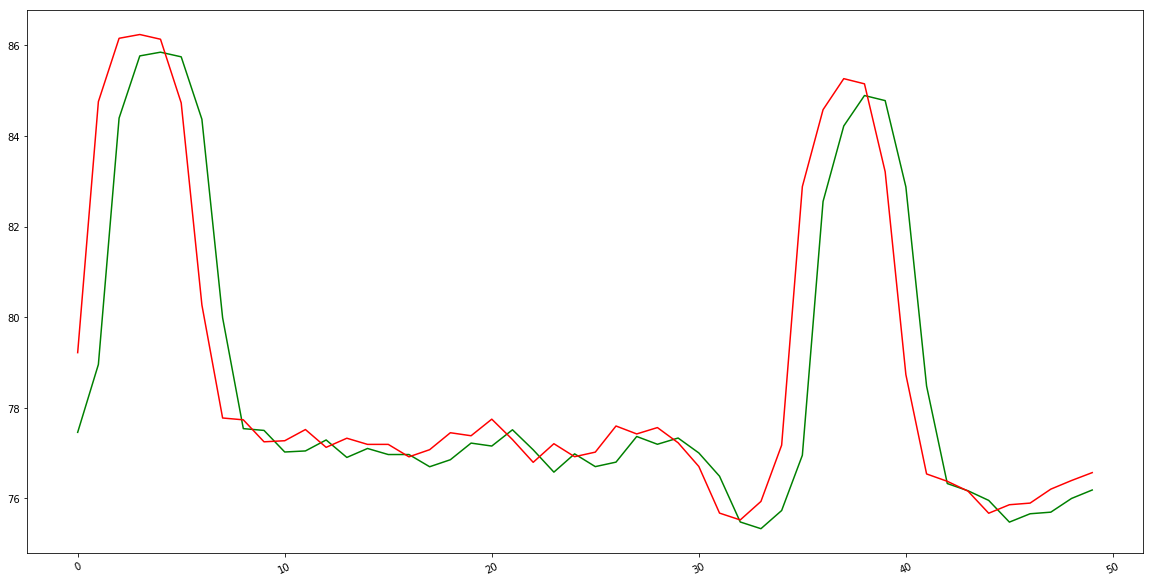

In [88]:
plt.plot(y_pred_2,color='green')
plt.plot(test_op_vanilla_1,color='red')
plt.xticks( rotation=25)
plt.show()

In [89]:
from sklearn.metrics import mean_squared_error

#Print MSE to see how good the model is
Error = mean_squared_error(test_op_vanilla,y_pred)
print(Error)

1.8519889186863447


In [93]:
from math import sqrt
def rmse(actual,pred):
    rmse=(mean_squared_error(actual,pred))
    return rmse

rmse_test=rmse(test_op_vanilla,y_pred)
print(rmse_test)

1.8519889186863447


# To check the index value where values are zero

In [33]:
# univariate_data.loc[univariate_data['AEDAHO_T9_V2']==0]